# Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import shapefile
import random
from math import sqrt

# Class Declarations for Node, Edge and Graph

In [2]:
def assignNewColor():
    return random.randint(1,1000)

In [3]:
class Node:
    def __init__(self, x, y, name):
        self.x = x
        self.y = y
        self.name = name
        self.color = -1

    def displayNodeDetails(self):
        print(" Name : ", self.name, "\n", "X : ", self.x, "\n", "Y : ",
              self.y, "\n", "Color : ", self.color, "\n")

In [4]:
class Edge:
    def __init__(self, n1, n2, cost, impo):
        self.node1 = n1
        self.node2 = n2
        self.cost = cost
        self.importance = impo

    def displayEdgeDetails(self):
        print(" Point 1 : ", self.node1, "\n", "Point 2 : ", self.node2, "\n",
              "Cost    : ", self.cost, "\n", "Impo    : ", self.importance,
              "\n")

In [5]:
class Graph:

    curParent = None

    def __init__(self):
        self.nodes = []
        self.edges = []
        self.selected = []
        self.subs = []

    def addNode(self, x, y, name):
        temp = Node(x, y, name)
        self.nodes.append(temp)

    def addEdge(self, n1, n2, cost, impo):
        temp = Edge(n1, n2, cost, impo)
        self.edges.append(temp)

    def getCost(self, edge):
        return edge.cost

    def getNodeIndex(self, name):
        for i in self.nodes:
            if (i.name == name): return self.nodes.index(i)

    def nodeEdges(self, nodeName):
        return [
            e for e in self.edges
            if (e.node1 == nodeName or e.node2 == nodeName)
        ]

    def findNeighbours(self, nodeName):
        neds = []
        for e in self.selected:
            if (e.node1 == nodeName):
                neds.append(self.nodes[self.getNodeIndex(e.node2)])
            elif (e.node2 == nodeName):
                neds.append(self.nodes[self.getNodeIndex(e.node1)])
        return neds

    def formSubGraphs(self):
        for node in self.nodes:
            if (node.color == -1):
                node.color = assignNewColor()
            neigh = self.findNeighbours(node.name)
            for n in neigh:
                if (n.color != node.color):
                    n.color = node.color

    def spreadColors(self, node):
        neigh = self.findNeighbours(node.name)
        for n in neigh:
            if (n.color != node.color):
                n.color = node.color
                self.spreadColors(n)

    def findNoOfSubGraphs(self):
        cnt = 0
        seen = []
        for node in self.nodes:
            if (node.color not in seen):
                seen.append(node.color)
                cnt += 1
        return cnt, seen

    def selectMinNodeEdges(self):
        for node in self.nodes:
            neds = self.nodeEdges(node.name)
            choosen = sorted(neds, key=self.getCost)[0]
            if (choosen not in self.selected):
                self.selected.append(choosen)

    def finalMSTforming(self):
        self.subs = []
        no_of_sub, colors = self.findNoOfSubGraphs()
        if (no_of_sub > 1):
            for i in range(no_of_sub):
                nsub = [n.name for n in g.nodes if n.color == colors[i]]
                ls = [
                    e for e in self.edges
                    if (e.node1 in nsub and e.node2 not in nsub
                        and e not in self.subs and e not in self.selected)
                ]
                self.subs += ls
            try:
                smallest = sorted(self.subs, key=self.getCost)[0]
                self.selected.append(smallest)
                self.spreadColors(self.nodes[self.getNodeIndex(
                    smallest.node1)])
                self.finalMSTforming()
            except:
                pass

# Shapefile Extraction

In [6]:
class shpOperations:
    
    def __init__(self,vpath,rpath):
        self.vil = shapefile.Reader(vpath)
        self.rds = shapefile.Reader(rpath)
        self.vPoints = []
        self.rPoints = []
        self.rRecords = []
        self.rPointsNew = []
        
    def extractPoints(self):
        for i in range(len(self.vil.shapes())):
            self.vPoints.append(self.vil.shape(i).points[0])
        for i in range(len(self.rds.shapes())):
            self.rPoints.append(self.rds.shape(i).points)
        for i in range(len(self.rds.records())):
            lst = []
            for j in range(1,len(self.rds.fields)):
                try:
                    lst.append((self.rds.fields[j][0],self.rds.record(i)[j-1]))
                except:
                    pass
            self.rRecords.append(lst)
        self.intersections = {k: [] for k in range(1,len(self.rPoints)+1)}
        self.rPointsNew = self.rPoints
        
    def print_roads(self):
        for i in self.rPointsNew:
            print(len(i),"\n",i,"\n")
    
#     def formLineEq(self,p1, p2):
#         A = (p1[1] - p2[1])
#         B = (p2[0] - p1[0])
#         C = (p1[0]*p2[1] - p2[0]*p1[1])
#         return A, B, -C

#     def getCurIntersection(self,pt1,pt2,pt3,pt4):
#         L1 = self.formLineEq(pt1,pt2)
#         L2 = self.formLineEq(pt3,pt4)
#         D  = L1[0] * L2[1] - L1[1] * L2[0]
#         Dx = L1[2] * L2[1] - L1[1] * L2[2]
#         Dy = L1[0] * L2[2] - L1[2] * L2[0]
#         if D != 0:
#             x = Dx / D
#             y = Dy / D
#             if(x>=min(pt1[0],pt2[0]) and x<=max(pt1[0],pt2[0]) 
#                and x>=min(pt3[0],pt4[0]) and x<=max(pt3[0],pt4[0])
#                and y>=min(pt1[1],pt2[1]) and y<=max(pt1[1],pt2[1])
#                and y>=min(pt3[1],pt4[1]) and y<=max(pt3[1],pt4[1])):
#                 return (x,y)
#         else:
#             return None
    
#     def findIntersections(self):
#         for i in range(len(self.rPointsNew)):
#             print("I : ", i+1, " has ", len(self.rPointsNew[i]))
#             for j in range(len(self.rPointsNew[i])-1):
#                 pt1 = self.rPointsNew[i][j]
#                 pt2 = self.rPointsNew[i][j+1]
#                 for k in range(i+1,len(self.rPointsNew)):
#                     for l in range(len(self.rPointsNew[k])-1):
#                         pt3 = self.rPointsNew[k][l]
#                         pt4 = self.rPointsNew[k][l+1]
#                         newPt = self.getCurIntersection(pt1,pt2,pt3,pt4)
#                         if(newPt != None): 
#                             if(newPt not in self.intersections[i+1]): 
#                                 self.intersections[i+1].append(newPt)
#                                 self.rPointsNew[i].insert(j+1,newPt)
#                             if(newPt not in self.intersections[k+1]): 
#                                 self.intersections[k+1].append(newPt)
#                                 self.rPointsNew[k].insert(l+1,newPt)

In [7]:
obj = shpOperations("../Data/Villages.shp","../Data/Road_Network.shp")

In [8]:
obj.extractPoints()

In [9]:
print(obj.rRecords[0])

[('Name', 'MR1'), ('PREFIX', 'Dharampur Chauk'), ('PRE_Type', 'Chauk'), ('SUFFIX', 'Race Course End'), ('FULL_NAME', 'Race Course to Dharampur Road'), ('Oneway', 'T'), ('Shape_Leng', 78.307448375), ('FT_SpeedLi', 80), ('TF_SpeedLi', 80), ('FT_Time', 0.0587305862812), ('TF_Time', 0.0587305862812)]


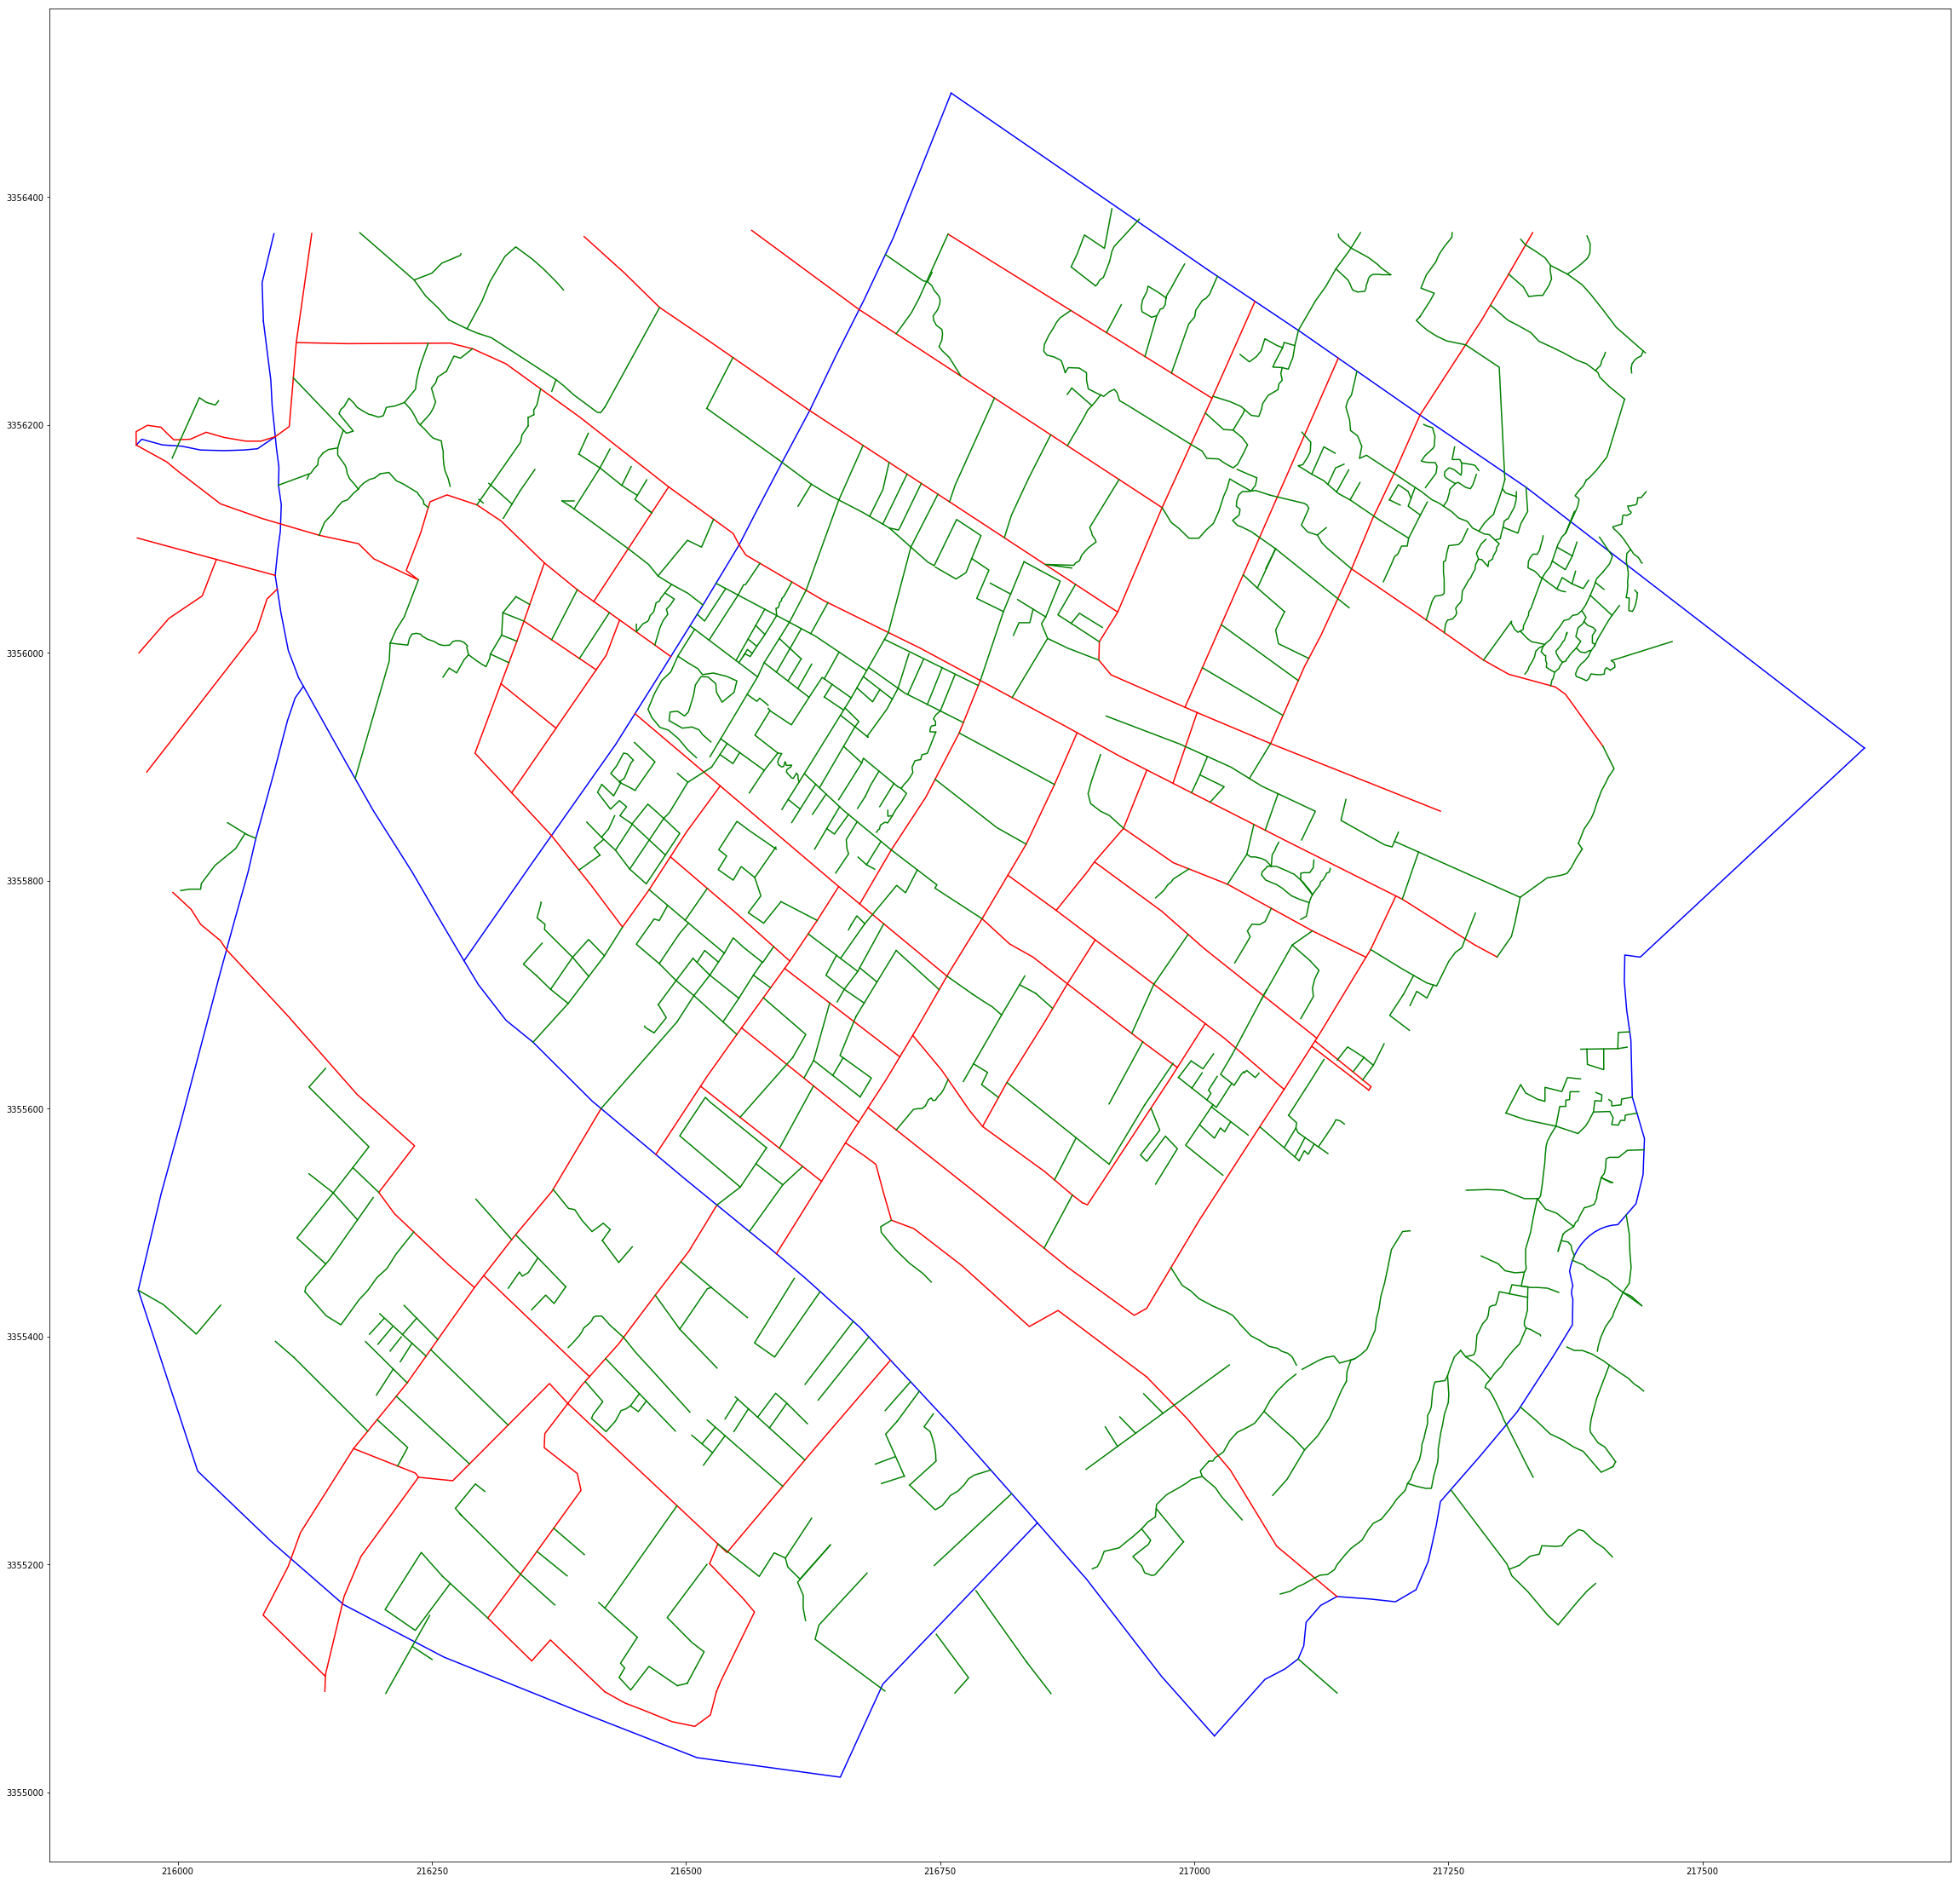

In [10]:
x,y,allTypes = [], [], []
masterRoads = []
plt.figure(figsize = (40,40))
for roadDetails in obj.rRecords:
    if 'MR' in roadDetails[0][1]:
        allTypes.append(1)
    elif 'Minor' in roadDetails[0][1]:
        allTypes.append(2)
    elif 'Street' in roadDetails[0][1]:
        allTypes.append(3)
i = 0
#printing all roads
for road in obj.rPoints:
    road = np.array(road)
    x = road[:,0]
    y = road[:,1]
    if allTypes[i] == 1:
        hnd1, = plt.plot(x,y,color='blue',label="Major Roads")
        masterRoads.append((road, 1, 0))
    elif allTypes[i] == 2:
        hnd2, = plt.plot(x,y,color='red',label="Minor Roads")
        masterRoads.append((road, 2, 0))
    elif allTypes[i] == 3:
        hnd3, = plt.plot(x,y,color='green',label="Streets")
        masterRoads.append((road, 3, 0))
    i = i+1
#printing all villages
# hnd4, = plt.plot(vPoints[:,0], vPoints[:,1], 'ko', label='villages')
# plt.legend(handles=[hnd1,hnd2,hnd3,hnd4],fontsize = 20)
# plt.show()

In [43]:
masterRoads = np.array(masterRoads)
print(masterRoads.shape)
masterPoints = []
for village in obj.vPoints:
    masterPoints.append((village, 0))
masterPoints = np.array(masterPoints) 
print(masterPoints.shape)

(541, 3)
(58, 2)


In [44]:
masterRoads.shape

(541, 3)

In [13]:
#Finding points lying on the line through co-incedence
for i in range(masterPoints.shape[0]):
    village = np.array(masterPoints[i][0])
    for road in masterRoads:
        for pointOnRoad in road[0]:
            if (np.array_equal(pointOnRoad,village) and road[1]==1):
                print("Village lies on Major Road")
                masterPoints[i][1] = 1
            elif (np.array_equal(pointOnRoad,village) and road[1]==2):
                print("Village lies on Minor Road")
                masterPoints[i][1] = 1   

Village lies on Minor Road
Village lies on Minor Road
Village lies on Major Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Major Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Major Road
Village lies on Minor Road
Village lies on Major Road
Village lies on Major Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Major Road
Village lies on Major Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Major Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Minor Road
Village lies on Major Road


### Fields of each road
<ul>
    <li>Name</li>
    <li>PREFIX</li>
    <li>PRE_Type</li>
    <li>SUFFIX</li>
    <li>FULL_NAME</li>
    <li>Oneway</li>
    <li>Shape_Leng</li>
    <li>FT_SpeedLi</li>
    <li>TF_SpeedLi</li>
    <li>FT_Time</li>
    <li>TF_Time</li>  
</ul>

In [14]:
def checkforPoint(pt, A, B):
    flag = -1
    m = A[0]*(pt[1] - B[1]) + pt[0]*(B[1]- A[1]) + B[0]*(A[1] - pt[1])
    if m == 0:
        if(A[0] < B[0]):
            if(pt[0]>A[0] and pt[0] < B[0]):
                flag = 1
            else:
                return False
        else:
            if(pt[0]<=A[0] and pt[0] >= B[0]):
                flag = 1
            else:
                return False
        if(A[1] < B[1]):
            if(pt[1]>=A[1] and pt[1] <= B[1]):
                return True
            else:
                return False
        else:
            if(pt[1]<=A[1] and pt[1] >= B[1]):
                return True
            else:
                return False
    else:
        return False

In [15]:
#Finding points lying on the line through collinear points
for i in range(masterPoints.shape[0]):
    village = np.array(masterPoints[i][0])
    for road in masterRoads:
        for j in range(len(road[0]) - 1):
            if(checkforPoint(village,road[0][j], road[0][j+1])) and road[1] == 1:
                masterPoints[i][1] = 1
                print("Found between major roads")
            elif(checkforPoint(village,road[0][j], road[0][j+1])) and road[1] == 2:
                masterPoints[i][1] = 1
                print("Found between minor roads")
            j = j+1            

Found between minor roads
Found between minor roads
Found between minor roads
Found between minor roads
Found between minor roads
Found between minor roads
Found between minor roads
Found between minor roads
Found between major roads
Found between minor roads
Found between minor roads
Found between major roads
Found between major roads
Found between minor roads
Found between minor roads
Found between minor roads
Found between minor roads
Found between minor roads
Found between minor roads


In [16]:
def plotRoadsandPoints(roads, points,roadLabels, pointLablels):
    plt.figure(figsize=(40,40))
    roadLabels = roadLabels.split(',')
    pointLabels = pointLablels.split(',')
    for road in roads:
        for i in range(len(roadLabels)):
            if(road[1] == int(roadLabels[i])):
                plt.plot(road[0][:,0],road[0][:,1],color=colorsRoad[i],label=roadLabels[i])
    vn = 1
    for point in points:
        for i in range(len(pointLabels)):
            if(point[1] == int(pointLabels[i])):
                plt.annotate(str(vn), xy=(point[0][0],point[0][1]), xytext=(point[0][0]+10,point[0][1]))
                plt.plot(point[0][0],point[0][1],colorsPoint[i],label=pointLablels[i])
        vn+=1
    plt.legend(handles=[hnd1,hnd2],fontsize = 20)
    plt.show()

In [17]:
colorsRoad = ['Red', 'Green', 'Blue']
colorsPoint = ['ko', 'k+', 'bo']

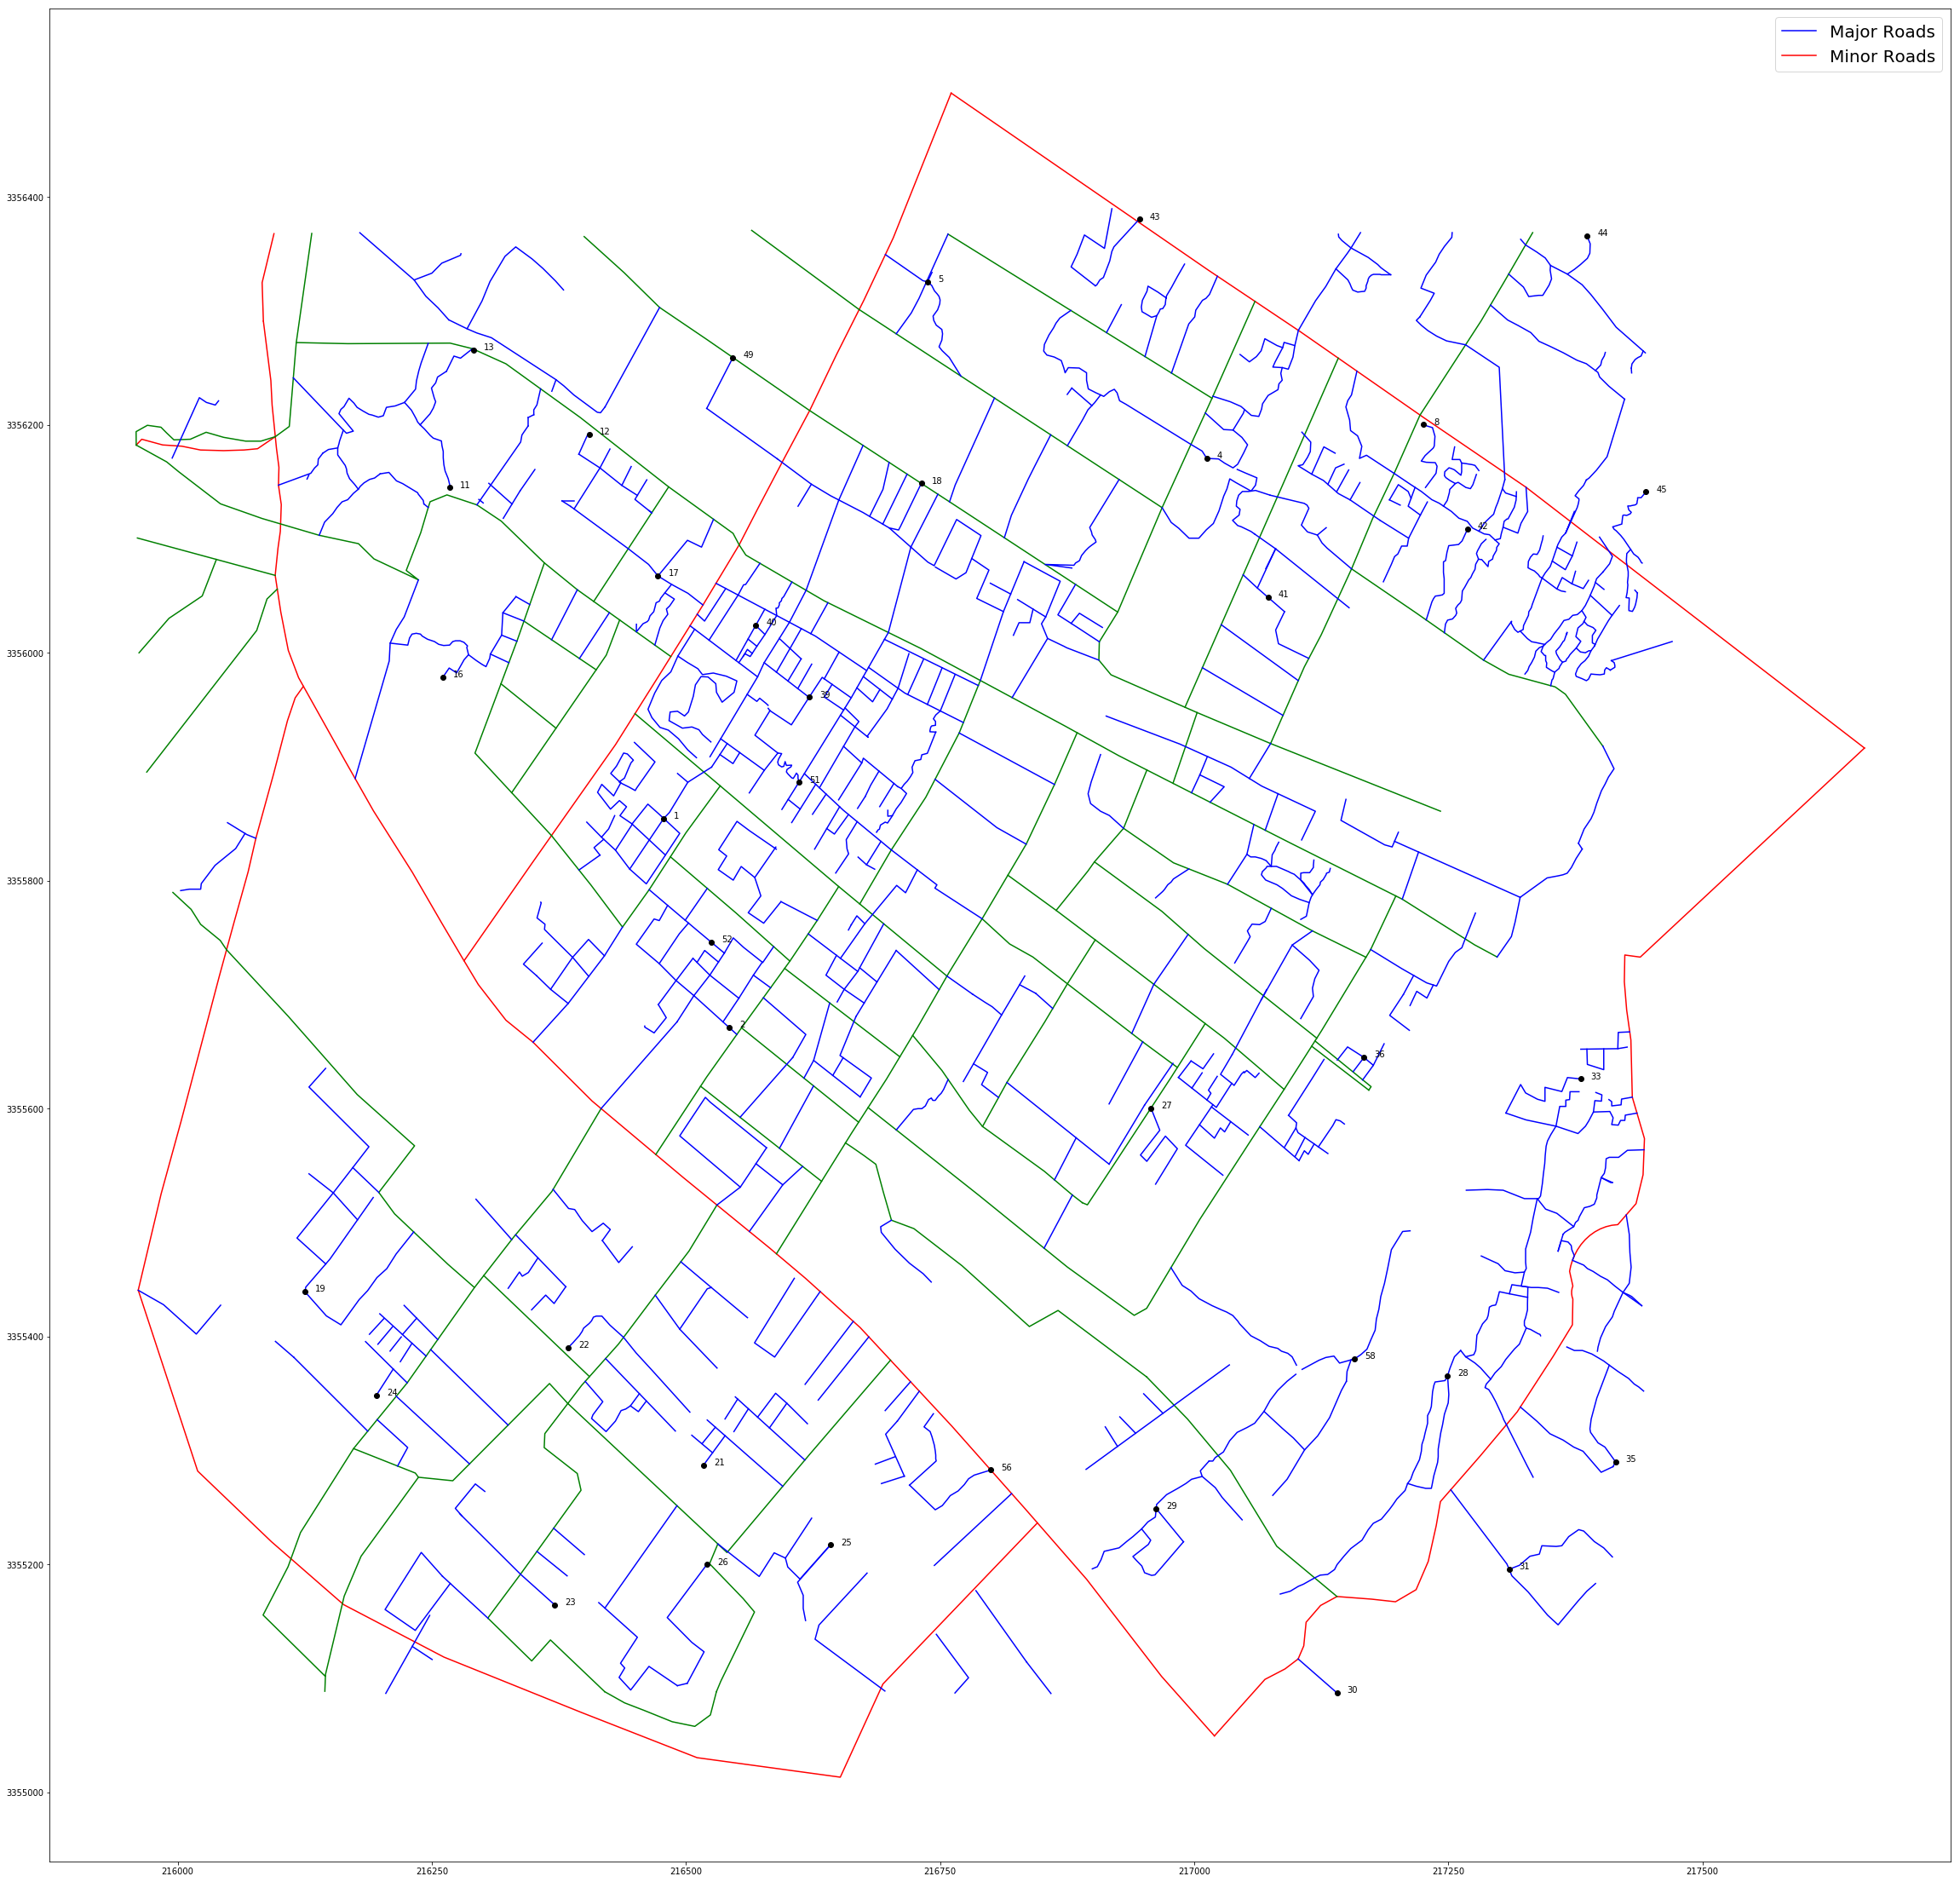

In [18]:
plotRoadsandPoints(masterRoads, masterPoints, "1,2,3", "0")

In [19]:
notConnected = []
notConnectedCount = 0
for village in masterPoints:
    if village[1] == 0:
        notConnectedCount = notConnectedCount + 1
        notConnected.append((village))
print(notConnectedCount)

38


In [20]:
notConnected = np.array(notConnected)
pointConsidered = 4
print(notConnected[pointConsidered][0])

[217225.8668999998, 3356200.496099999]


In [21]:
def distOfPointFromLine(pt, p1, p2):
#     val = np.float64(0.0)
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    try:
        val = abs(A*pt[0] + B*pt[1] + C) / sqrt(A*A + B*B)
        x = (B*(B*pt[0]-A*p1[1])-A*C)/(A*A+B*B)
        y = (A*(A*pt[1]-B*pt[0])-B*C)/(A*A+B*B)
    except:
        pass
    return val, (x,y)

In [22]:
print(masterRoads[0][0][1])

[ 216083.1341 3356324.9971]


In [23]:
distOfPointFromLine((3,5), (0,2), (5,2))

(3.0, (3.0, 2.0))

### villages to be ignored because they are very close to major raods = [18, 10, 29, 33, 36, 7, 30, 4, 13, 5, 6]


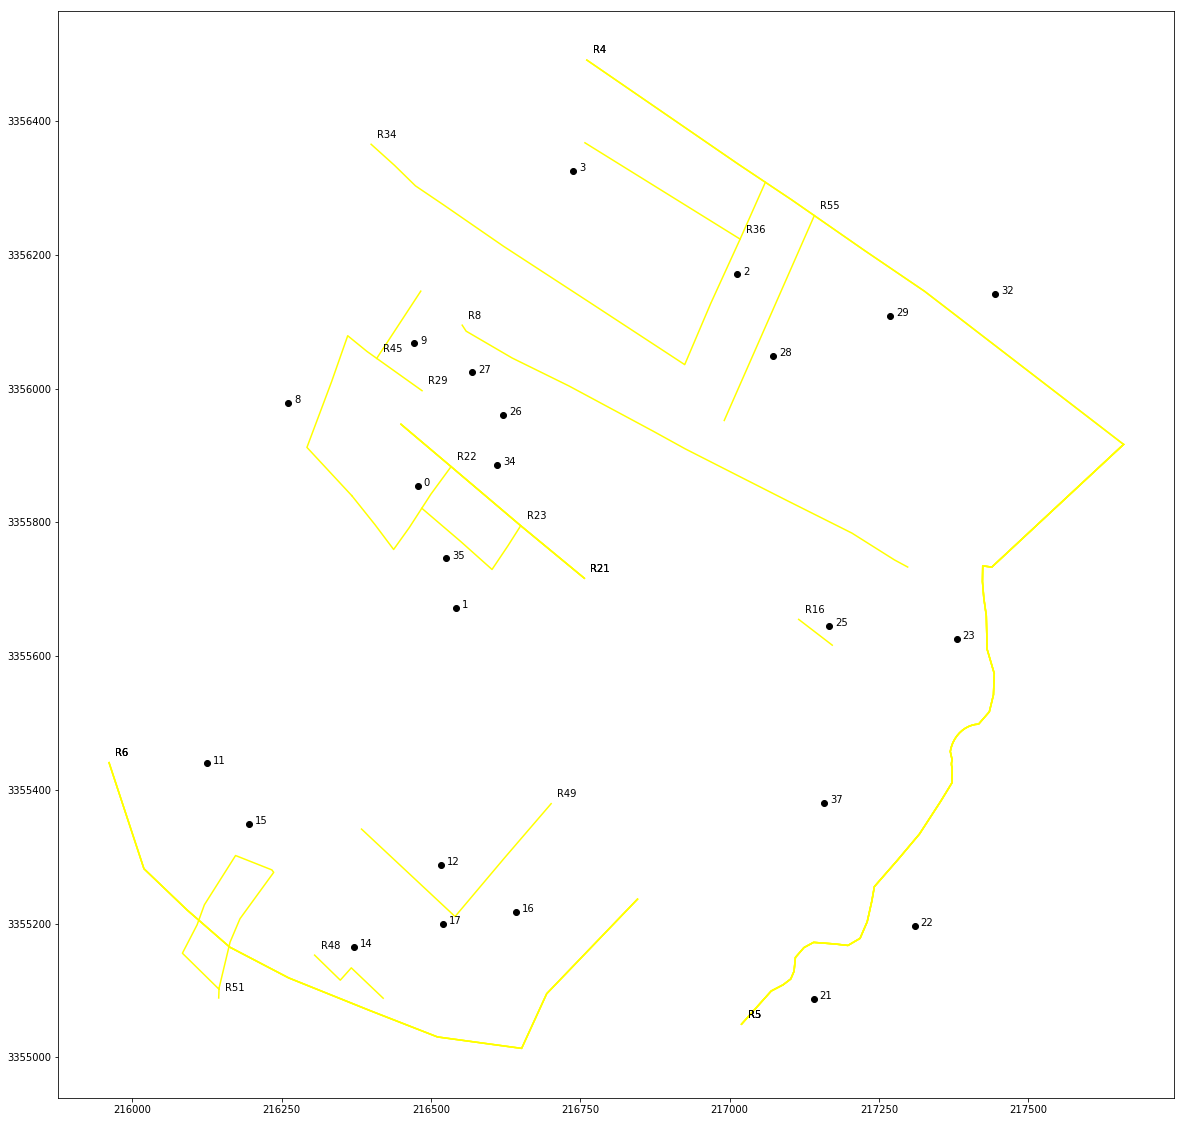

In [24]:
plt.figure(figsize=(20,20))
d = {}
vn = 0
for vil in notConnected:
    pt = vil[0]
    if(vn not in [18, 10, 33, 36, 7, 30, 4, 13, 5, 6]):
        dist = []
        for i in range(len(masterRoads)):
            if(masterRoads[i][1] in [1,2]):
                for j in range(len(masterRoads[i][0])-1):
                    val,(x,y) = distOfPointFromLine(pt, masterRoads[i][0][j], masterRoads[i][0][j+1])
                    if(x >= min(masterRoads[i][0][j][0], masterRoads[i][0][j+1][0]) and \
                      x <= max(masterRoads[i][0][j][0], masterRoads[i][0][j+1][0]) and \
                      y >= min(masterRoads[i][0][j][1], masterRoads[i][0][j+1][1]) and \
                      y <= max(masterRoads[i][0][j][1], masterRoads[i][0][j+1][1])):
                        dist.append((val, i))
                    else: dist.append((1000,i))
        dist = sorted(dist,key=lambda x: x[0])
        roadNumber = dist[0][1]
        d[vn] = (roadNumber, dist[0][0])
        r = masterRoads[roadNumber][0]
        if(dist[0][0] != 1000):
            plt.annotate(str(vn), xy=(pt[0],pt[1]), xytext=(pt[0]+10,pt[1]))
            plt.annotate('R'+str(roadNumber), xy=(r[0][0],r[0][1]), xytext=(r[0][0]+10,r[0][1]+10))
            plt.plot(r[:,0],r[:,1],color="yellow",label = "Interested")
            plt.plot(pt[0],pt[1], 'ko', label='village')
    vn+=1
plt.show()

In [25]:
dist = sorted(d, key=lambda x: d[x][1])
dist

[2,
 25,
 0,
 28,
 35,
 9,
 3,
 34,
 27,
 23,
 15,
 14,
 8,
 29,
 32,
 12,
 22,
 21,
 26,
 11,
 17,
 1,
 16,
 37,
 19,
 20,
 24,
 31]

## Intersections finding

In [26]:
def findIntersection(p1, p2, p3, p4):
    x = ((p1[0]*p2[1] - p1[1]*p2[0])*(p3[0]-p4[0]) - (p1[0]-p2[0])*(p3[0]*p4[1]-p3[1]*p4[0])) \
    / ((p1[0]-p2[0])*(p3[1]-p4[1])-(p1[1]-p2[1])*(p3[0]-p4[0]))
    
    y = ((p1[0]*p2[1] - p1[1]*p2[0])*(p3[1]-p4[1]) - (p1[1]-p2[1])*(p3[0]*p4[1]-p3[1]*p4[0])) \
    / ((p1[0]-p2[0])*(p3[1]-p4[1])-(p1[1]-p2[1])*(p3[0]-p4[0]))
    
    if(x >= min(p1[0],p2[0]) and x>= min(p3[0],p4[0]) and x<=max(p1[0],p2[0]) and x<= max(p3[0],p4[0]) and \
       y >= min(p1[1],p2[1]) and y>= min(p3[1],p4[1]) and y<=max(p1[1],p2[1]) and y<= max(p3[1],p4[1])):
        return (x,y)
    else:
        return None

In [27]:
def calculateRoadLengths(masterRoads):
    for i in range(len(masterRoads)):
        road = masterRoads[i]
        l = 0
        for j in range(len(road[0])-1):
            l += np.sqrt((road[0][j+1][1]-road[0][j][1])**2 + (road[0][j+1][0]-road[0][j][0])**2)
        masterRoads[i][2] = l

# running the fn
calculateRoadLengths(masterRoads)

In [39]:
def get_intersections(masterRoads):
    for i in range(len(masterRoads)):
        if(masterRoads[i][1] == 3):
            road1 = masterRoads[i][0]
            for k in range(len(road1)-1):
                pt1 = road1[k]
                pt2 = road1[k+1]
                for j in range(len(masterRoads)):
                    if(i != j and masterRoads[j][1] in [1,2,3]):
                        road2 = masterRoads[j][0]
                        for l in range(len(road2)-1):
                            pt3 = road2[l]
                            pt4 = road2[l+1]
                            inter = findIntersection(pt1,pt2,pt3,pt4)
                            if(inter!=None):
                                masterRoads[i][0] = np.insert(masterRoads[i][0],np.where(road1 == pt1)[0][0]+1,np.array(inter), axis=0)
                                masterRoads[j][0] = np.insert(masterRoads[j][0],np.where(road2 == pt3)[0][0]+1,np.array(inter), axis=0)

                                
# running the fn                                
r = masterRoads
get_intersections(r)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


## plotting roads and villages now

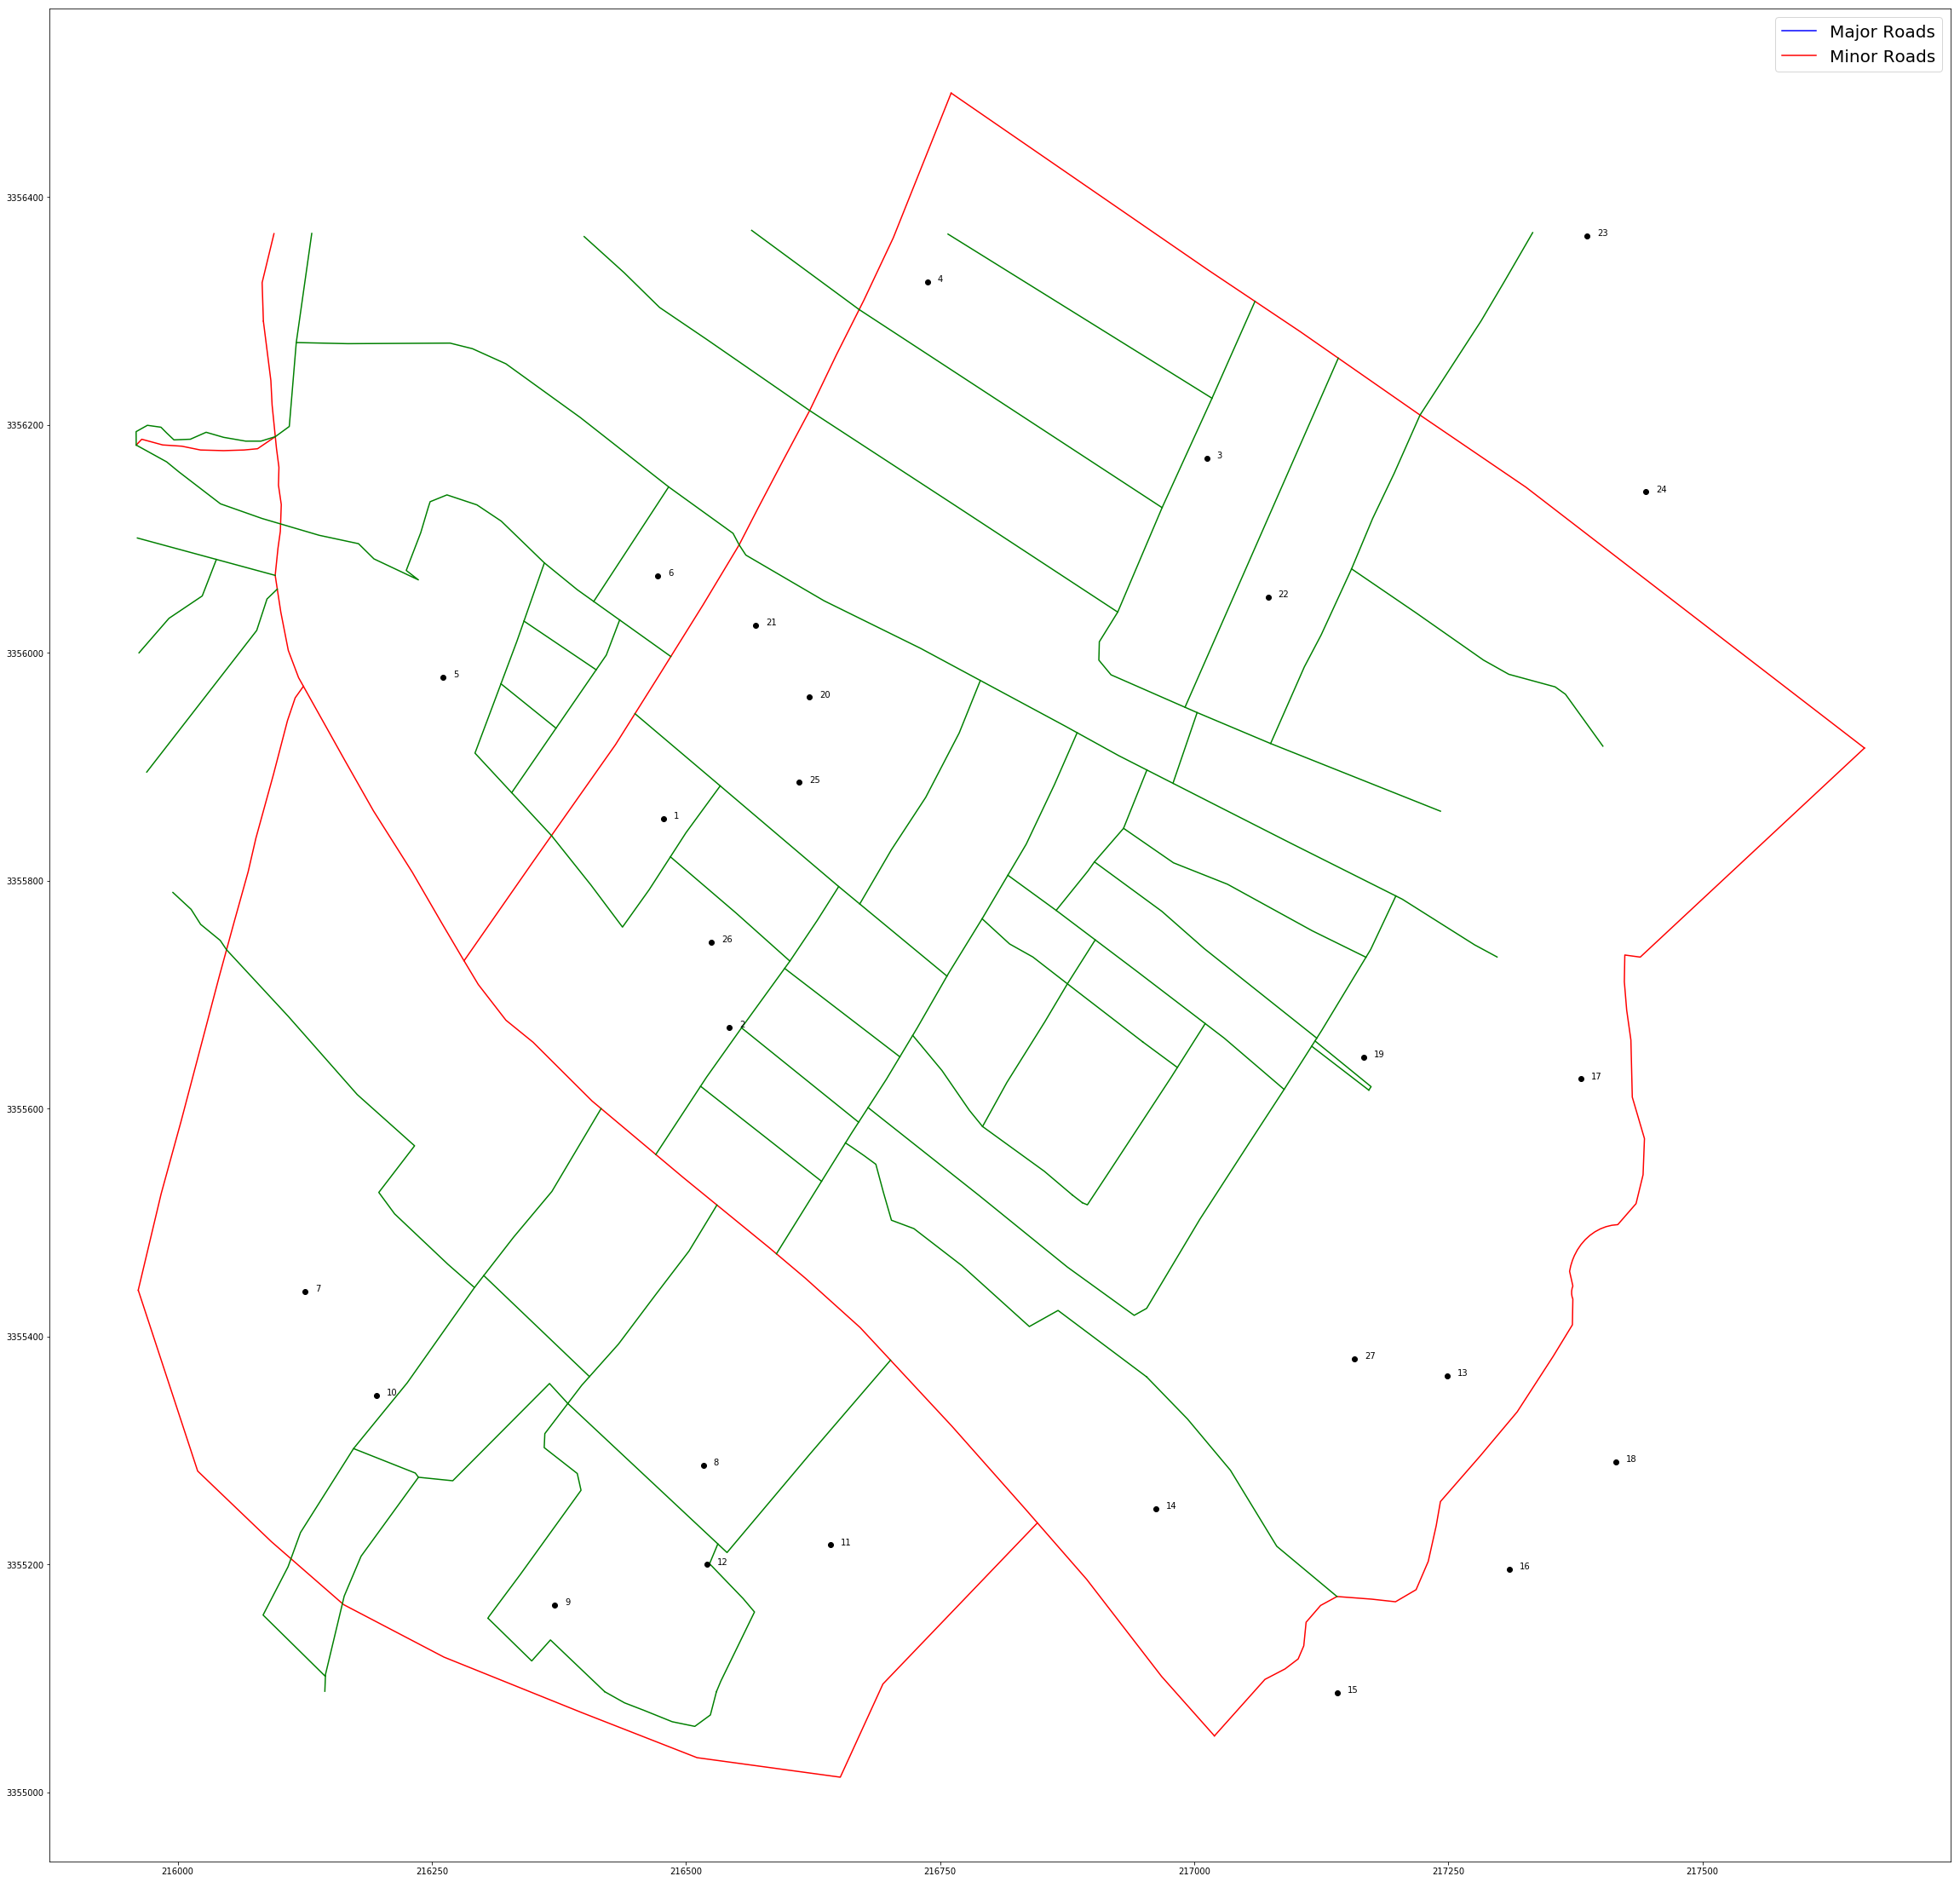

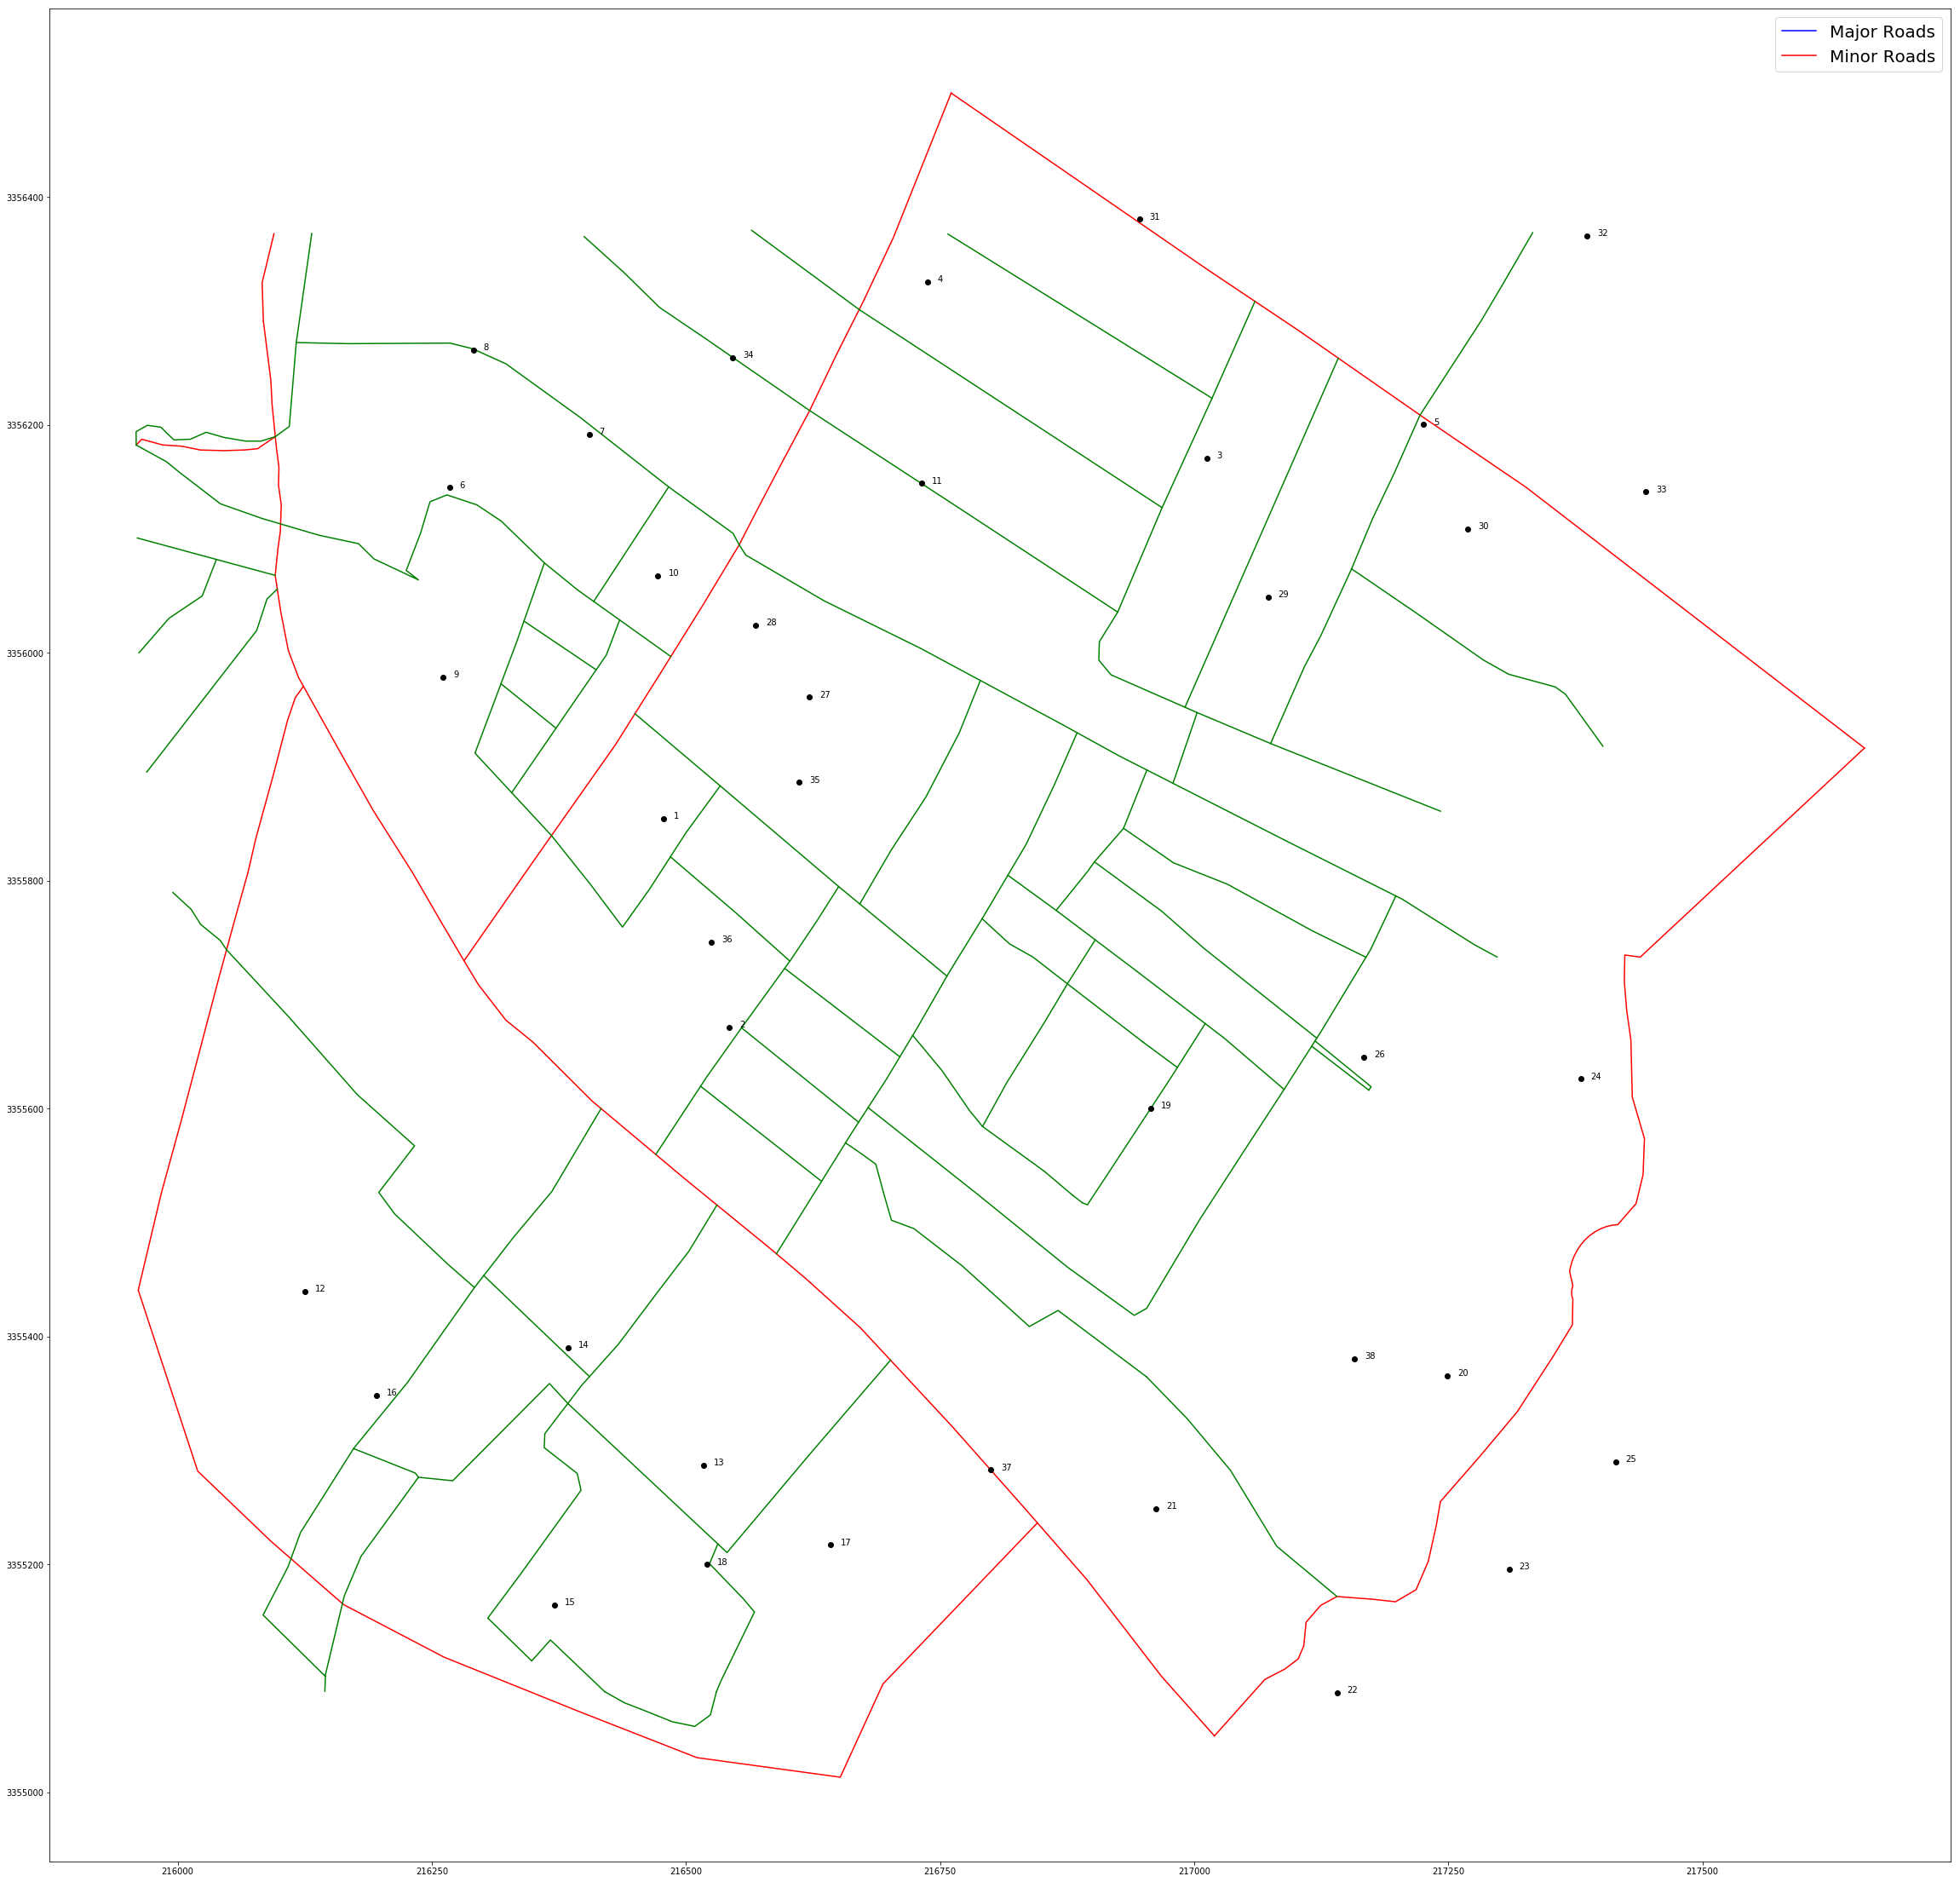

In [40]:
notCon = notConnected
l = [18, 10, 29, 33, 36, 7, 30, 4, 13, 5, 6]
l = sorted(l)
for n in range(len(l)):
    notCon = np.delete(notCon,l[n],0)
    l = [h-1 for h in l]
plotRoadsandPoints(r, notCon, "1,2", "0")
plotRoadsandPoints(r, notConnected, "1,2", "0")

## find roads from villages to either major roads or other villages

In [42]:
roadsFromEachVillage = []
for i in range(len(notCon)):
    for d in range(len(r)):
        if(notCon[i][0] in r[d][0]):
            roadsFromEachVillage.append((d,r[d][0]))